In [1]:
import pandas as pd
import os

import folium
import matplotlib.pyplot as plt

### Helper functions

In [2]:
def plot_coordinates_on_map(coordinates, count_values, width='100%', height='500px', zoom_start=5):
    """
    Plots a list of coordinates on an interactive map.
    
    Parameters:
    - coordinates: A list of tuples, where each tuple contains (latitude, longitude).
    - width: Width of the map display (default '100%').
    - height: Height of the map display (default '500px').
    - zoom_start: Initial zoom level for the map (default 5).
    """
    min_count, max_count = min(count_values), max(count_values)
    
    # Function to determine color based on count value
    def get_color(count):
        if count <= (min_count + (max_count - min_count) / 3):
            return 'green'
        elif count <= (min_count + 2 * (max_count - min_count) / 3):
            return 'orange'
        else:
            return 'red'
    
    # Create a map centered around the average of the coordinates
    if coordinates:
        center_lat = sum([coord[0] for coord in coordinates]) / len(coordinates)
        center_lon = sum([coord[1] for coord in coordinates]) / len(coordinates)
    else:
        center_lat, center_lon = 0, 0
    map = folium.Map(location=[center_lat, center_lon], zoom_start=zoom_start)
    
    # Add a round circle marker for each coordinate with color based on count
    for (lat, lon), count in zip(coordinates, count_values):
        folium.CircleMarker(
            location=[lat, lon],
            radius=2,  # You can also scale the radius based on count if desired
            color=get_color(count),
            fill=True,
            fill_color=get_color(count),
            fill_opacity=0.7
        ).add_to(map)
    
    # Display the map
    display(map)

def plot_histogram(counts, bins='auto', title='Histogram of Counts', xlabel='Count', ylabel='Frequency'):
    """
    Plots a histogram for a list of counts.
    
    Parameters:
    - counts: A list of numerical values representing counts.
    - bins: Number of bins or 'auto' to let matplotlib decide. Default is 'auto'.
    - title: The title of the histogram. Default is 'Histogram of Counts'.
    - xlabel: The label for the x-axis. Default is 'Count'.
    - ylabel: The label for the y-axis. Default is 'Frequency'.
    """
    plt.figure(figsize=(10, 6))  # Sets the figure size
    plt.hist(counts, bins=bins, color='skyblue', edgecolor='black')  # Plots the histogram
    plt.title(title)  # Sets the title of the histogram
    plt.xlabel(xlabel)  # Sets the x-axis label
    plt.ylabel(ylabel)  # Sets the y-axis label
    plt.grid(axis='y', alpha=0.75)  # Adds a grid on y-axis, with some transparency
    plt.show()  # Displays the plot




In [7]:
data = pd.read_csv('../cos_data/frog_data_cos.csv')
coordinates = []
for index, item in data.iterrows():
    cord = item['id'].split('_')
    # print(cord)
    coordinates.append(((float(cord[2])+float(cord[3]))/2,(float(cord[4])+float(cord[5]))/2))

count = list(data['frog_count'])
# modified_count = [x if x <= 50 else 50 for x in count]
modified_count = count
max(modified_count)

315

In [14]:
p_absence = os.listdir('../cos_data/costarica_absence3/')
print(len(p_absence))
coordinates_pa = []
for folder in p_absence:
    cord = folder.split('_')
    # print(cord)
    coordinates_pa.append(((float(cord[3])+float(cord[4]))/2,(float(cord[5])+float(cord[6]))/2))


2178


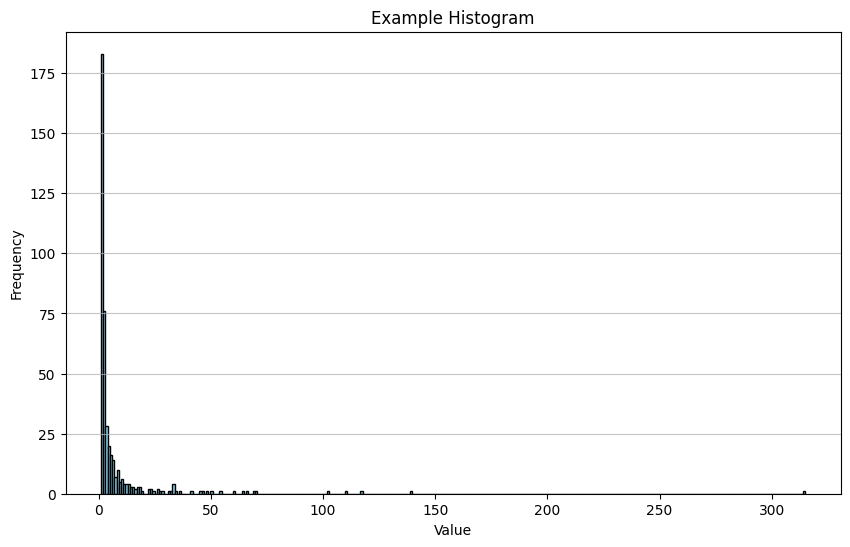

In [8]:
plot_histogram(modified_count, bins=315, title='Example Histogram', xlabel='Value', ylabel='Frequency')

In [9]:
plot_coordinates_on_map(coordinates,modified_count, zoom_start=4)

In [21]:
dwn_data = os.listdir('../data/australia')
len(dwn_data)

5730

In [22]:
len(modified_count)

5893